<a href="https://colab.research.google.com/github/Aouisssaoui-Zied/fullpack-ia-module-1/blob/main/Test_Analyse_des_Donn%C3%A9es_et_S%C3%A9ries_Temporelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1 : Analyse du Churn des Utilisateurs de Waze**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Tache1: Exploration des Données (EDA)

 1.1: Charger le dataset et afficher les premières lignes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Full pack IA/Module1:Data analysis/waze_dataset.csv', delimiter=';')

In [ ]:
data

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android
3,3.0,retained,49.0,40.0,67.589221,15.0,322.0,7.0,913.591123,587.196542,7.0,3.0,iPhone
4,4.0,retained,84.0,68.0,168.247020,1562.0,166.0,5.0,3950.202008,1219.555924,27.0,18.0,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994.0,retained,60.0,55.0,207.875622,140.0,317.0,0.0,2890.496901,2186.155708,25.0,17.0,iPhone
14995,14995.0,retained,42.0,35.0,187.670313,2505.0,15.0,10.0,4062.575194,1208.583193,25.0,20.0,Android
14996,14996.0,retained,273.0,219.0,422.017241,1873.0,17.0,0.0,3097.825028,1031.278706,18.0,17.0,iPhone
14997,14997.0,churned,149.0,120.0,180.524184,3150.0,45.0,0.0,4051.758549,254.187763,6.0,6.0,iPhone


In [ ]:
data.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0.0,retained,283.0,226.0,296.748273,2276.0,208.0,0.0,2628.845068,1985.775061,28.0,19.0,Android
1,1.0,retained,133.0,107.0,326.896596,1225.0,19.0,64.0,13715.920550,3160.472914,13.0,11.0,iPhone
2,2.0,retained,114.0,95.0,135.522926,2651.0,0.0,0.0,3059.148818,1610.735904,14.0,8.0,Android
3,3.0,retained,49.0,40.0,67.589221,15.0,322.0,7.0,913.591123,587.196542,7.0,3.0,iPhone
4,4.0,retained,84.0,68.0,168.247020,1562.0,166.0,5.0,3950.202008,1219.555924,27.0,18.0,Android


1.2: Identifier le nombre total de valeurs manquantes par colonne.

In [ ]:
data.isnull().sum()

,0
ID,2
label,703
sessions,2
drives,2
total_sessions,2
n_days_after_onboarding,3
total_navigations_fav1,2
total_navigations_fav2,2
driven_km_drives,3
duration_minutes_drives,4


1.3 : Remplacer les valeurs manquantes par une méthode appropriée

In [ ]:
for col in data.select_dtypes(include=np.number).columns:
    data[col] = data[col].fillna(data[col].mean())


In [ ]:
for col in data.select_dtypes(include='object').columns:
  data[col] = data[col].fillna(data[col].mode()[0])

In [ ]:
data.isnull().sum()

,0
ID,0
label,0
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


1.4: Afficher les statistiques descriptives des variables numériques.

In [ ]:
data.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.00000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.96526,80.575048,67.229646,189.777020,1752.105828,121.436621,29.625725,4036.643232,1860.174857,15.530275,12.177369
std,4329.17666,80.648359,65.875674,136.207883,1008.382899,148.007593,45.392705,2500.210372,1444.156791,8.997537,7.815200
min,0.00000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3751.50000,23.000000,20.000000,90.759771,881.000000,9.000000,0.000000,2216.498385,837.311598,8.000000,5.000000
50%,7499.96526,56.000000,48.000000,159.266291,1746.000000,70.000000,9.000000,3489.546991,1479.966285,16.000000,12.000000
75%,11248.50000,111.000000,93.000000,253.867298,2629.000000,177.000000,43.000000,5285.430143,2462.674883,23.000000,19.000000
max,14998.00000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


1.5: Générer des histogrammes pour visualiser la distribution de total_km, driving_days et
total_drives.

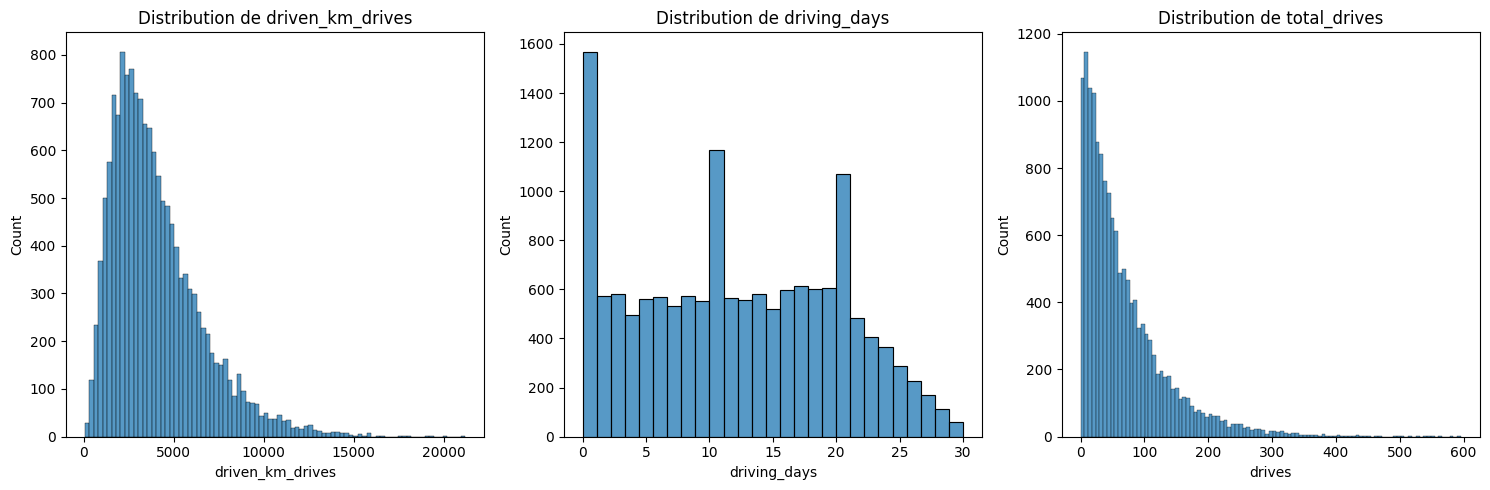

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['driven_km_drives'])
plt.title('Distribution de driven_km_drives')

plt.subplot(1, 3, 2)
sns.histplot(data['driving_days'])
plt.title('Distribution de driving_days')

plt.subplot(1, 3, 3)
sns.histplot(data['drives'])
plt.title('Distribution de total_drives')

plt.tight_layout()
plt.show()

1.6: Calculer une matrice de corrélation et identifier la paire de variables la plus corrélée.

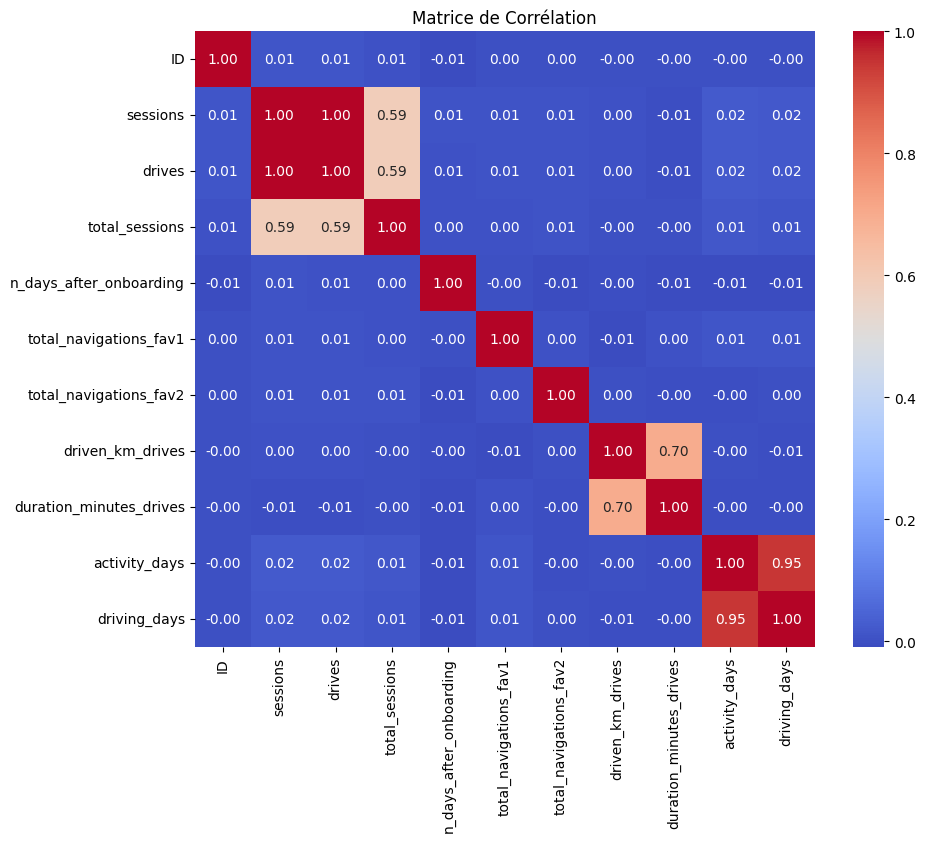

La paire de variables la plus corrélée est : ('sessions', 'drives')


In [ ]:
# Filtrer les colonnes numériques
numeric_data = data.select_dtypes(include=[np.number])

# Calculer la matrice de corrélation
correlation_matrix = numeric_data.corr()

# Afficher la matrice de corrélation sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matrice de Corrélation')
plt.show()

# Identifier la paire de variables la plus corrélée
correlation_matrix_unstacked = correlation_matrix.unstack()
sorted_correlations = correlation_matrix_unstacked.sort_values(ascending=False)
# Exclure les corrélations parfaites (1.0) d'une variable avec elle-même
most_correlated_pair = sorted_correlations[sorted_correlations < 1.0].idxmax()
print(f"La paire de variables la plus corrélée est : {most_correlated_pair}")

Tache2: Feature Engineering

2.1: Création de la variable km_per_driving_day

In [ ]:
# Calculer la variable km_per_driving_day
data['km_per_driving_day'] = data['driven_km_drives'] / data['driving_days']

# Remplacer les valeurs infinies (division par zéro) par 0
data.loc[data['km_per_driving_day'].isin([np.inf, -np.inf]), 'km_per_driving_day'] = 0

# Vérifier les statistiques descriptives
km_per_driving_day_stats = data['km_per_driving_day'].describe()
print(km_per_driving_day_stats)

count    14999.000000
mean       578.283022
std       1029.523940
min          0.000000
25%        136.614642
50%        272.591429
75%        557.590570
max      15420.234110
Name: km_per_driving_day, dtype: float64


2.2: Création de la variable professional_driver

In [ ]:
# 1. Création de la variable 'professional_driver'
data.loc[(data['drives'] >= 60) & (data['driving_days'] >= 15), 'professional_driver'] = 1  # Met à 1 pour les professionnels
data['professional_driver'] = data['professional_driver'].fillna(0)  # Met à 0 pour les non-professionnels

# 2. Vérifier la répartition des professionnels et non-professionnels
print(data['professional_driver'].value_counts())

# 3. Calculer le churn rate pour les professionnels et non-professionnels
pro_churn_rate = data[data['professional_driver'] == 1]['label'].value_counts(normalize=True).get('churned', 0)
non_pro_churn_rate = data[data['professional_driver'] == 0]['label'].value_counts(normalize=True).get('churned', 0)

print(f"Churn rate des professionnels : {pro_churn_rate}")
print(f"Churn rate des non-professionnels : {non_pro_churn_rate}")

professional_driver
0.0    12415
1.0     2584
Name: count, dtype: int64
Churn rate des professionnels : 0.07236842105263158
Churn rate des non-professionnels : 0.18880386629077728


Tache3: Encodage et Vérification de la Multicolinéarité

3.1: Encodage de la variable churned

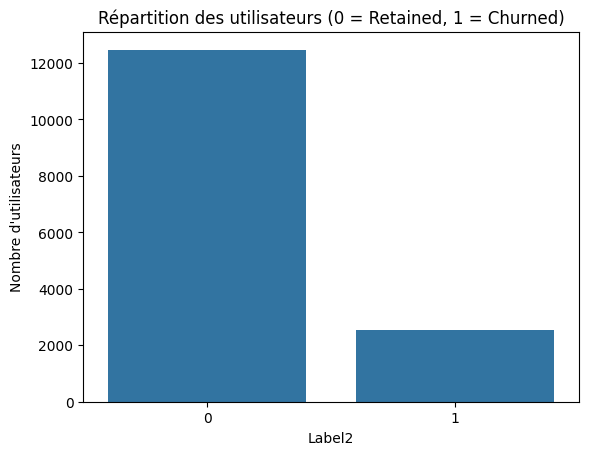

In [ ]:
# Convertir la variable churned en binaire (0 = retained, 1 = churned)
data['label2'] = data['label'].apply(lambda x: 1 if x == 'churned' else 0)

# Visualiser la répartition
sns.countplot(x='label2', data=data)
plt.title('Répartition des utilisateurs (0 = Retained, 1 = Churned)')
plt.xlabel('Label2')
plt.ylabel('Nombre d\'utilisateurs')
plt.show()

3.2: Encodage de la variable device

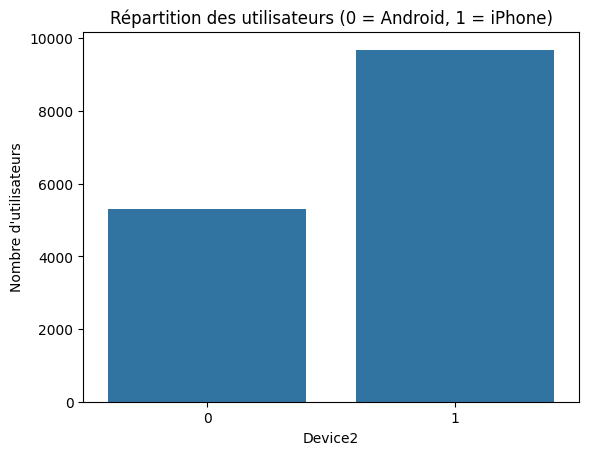

In [ ]:
# Convertir la variable device en binaire (0 = Android, 1 = iPhone)
data['device2'] = data['device'].apply(lambda x: 1 if x == 'iPhone' else 0)

# Visualiser la répartition
sns.countplot(x='device2', data=data)
plt.title('Répartition des utilisateurs (0 = Android, 1 = iPhone)')
plt.xlabel('Device2')
plt.ylabel('Nombre d\'utilisateurs')
plt.show()


3.3: Vérification de la Multicolinéarité

In [ ]:
# Générer la matrice de corrélation
correlation_matrix = data.select_dtypes(include=[np.number]).corr()

# Identifier les paires avec une corrélation > 0.7
high_correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
high_correlation_pairs = high_correlation_pairs[(high_correlation_pairs > 0.7) & (high_correlation_pairs < 1.0)]

# Afficher les paires fortement corrélées
print("Paires de variables avec une corrélation > 0.7 :")
print(high_correlation_pairs)

# Recommander la suppression d'une variable fortement corrélée
if not high_correlation_pairs.empty:
    var1, var2 = high_correlation_pairs.index[0]
    print(f"\nRecommandation : Supprimer '{var2}' car il est fortement corrélé avec '{var1}'.")
else:
    print("\nAucune paire de variables n'a une corrélation > 0.7.")

Paires de variables avec une corrélation > 0.7 :
drives         sessions         0.996821
sessions       drives           0.996821
driving_days   activity_days    0.947594
activity_days  driving_days     0.947594
dtype: float64

Recommandation : Supprimer 'sessions' car il est fortement corrélé avec 'drives'.


**Task 2 : Analyse des Séries Temporelles**

In [ ]:
import datetime

1. Préparation et Exploration des Données  

1.1 : Charger le dataset et afficher les premières lignes.

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Full pack IA/Module1:Data analysis/daily-minimum-temperatures-in-me.csv')

In [ ]:
df

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8
...,...,...
3645,12/27/1990,14
3646,12/28/1990,13.6
3647,12/29/1990,13.5
3648,12/30/1990,15.7


In [ ]:
df.head()

,Date,Daily minimum temperatures
0,1/1/1981,20.7
1,1/2/1981,17.9
2,1/3/1981,18.8
3,1/4/1981,14.6
4,1/5/1981,15.8


1.2 : Vérifier le type des données et convertir Date en format datetime

In [ ]:
df.dtypes

,0
Date,object
Daily minimum temperatures,object


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

1.3 : Vérifier la présence de valeurs manquantes et les traiter

In [ ]:
df.isnull().sum()

,0
Date,0
Daily minimum temperatures,0


4. Afficher des statistiques descriptives sur la température

In [ ]:
# Convert 'Daily minimum temperatures' to numeric, handling errors
df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')

min_temp = df['Daily minimum temperatures'].min()  # Température minimale
max_temp = df['Daily minimum temperatures'].max()  # Température maximale
mean_temp = df['Daily minimum temperatures'].mean()  # Température moyenne
median_temp = df['Daily minimum temperatures'].median()  # Médiane des températures

print(f"Température minimale : {min_temp}")
print(f"Température maximale : {max_temp}")
print(f"Température moyenne : {mean_temp}")
print(f"Température médiane : {median_temp}")

Température minimale : 0.0
Température maximale : 26.3
Température moyenne : 11.186646558815465
Température médiane : 11.0


1.5 : Tracer l’évolution de la température sur toute la période couverte par les données.

In [ ]:
df = df.set_index('Date')

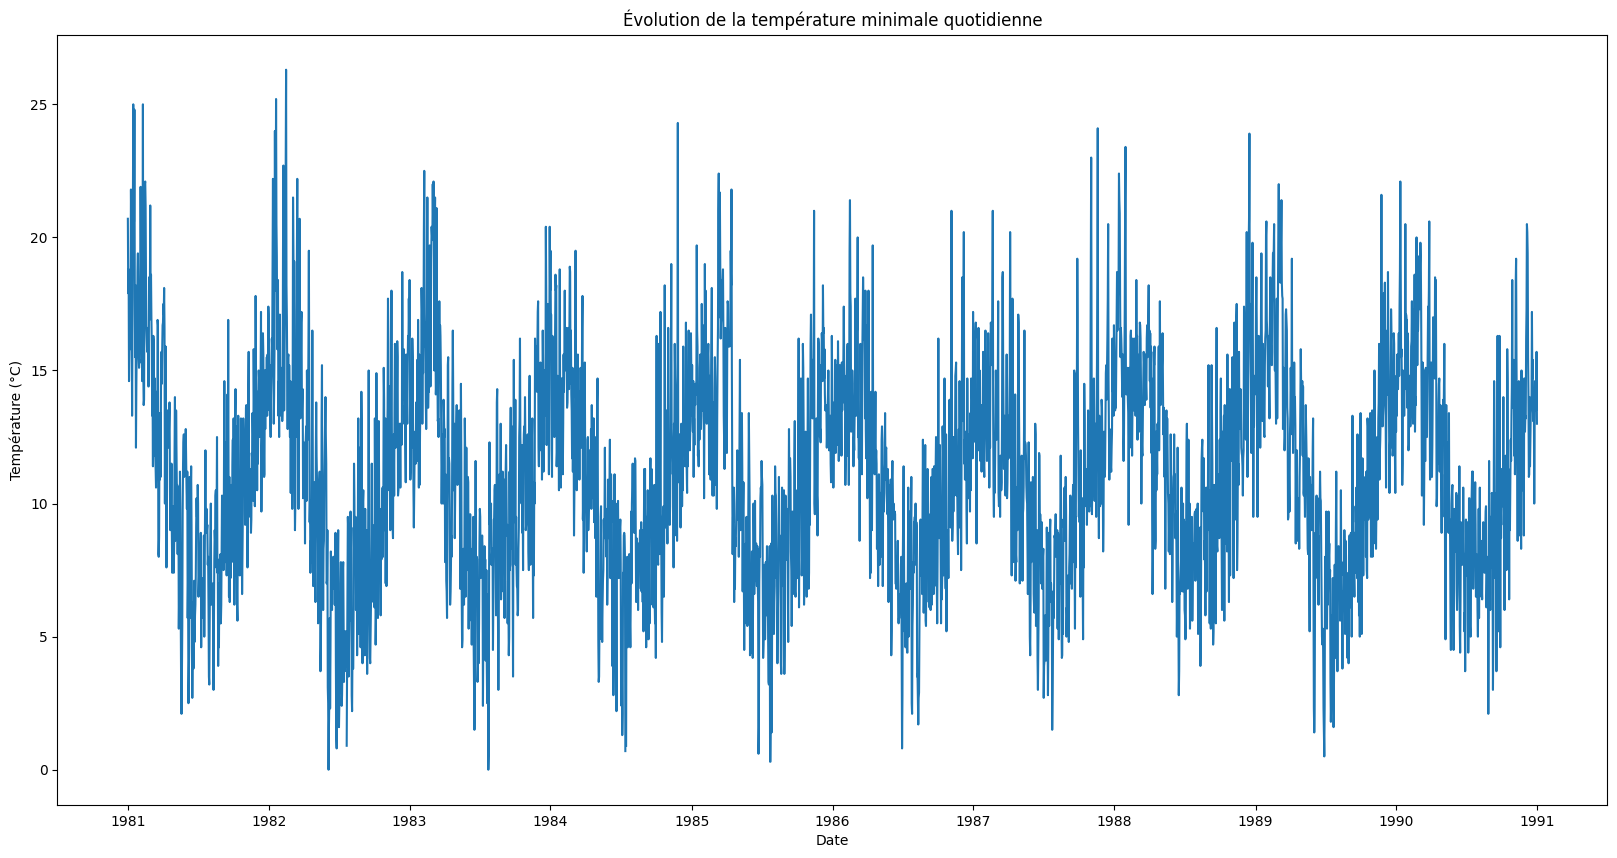

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(df.index, df['Daily minimum temperatures'])
plt.title('Évolution de la température minimale quotidienne')
plt.xlabel('Date')
plt.ylabel('Température (°C)')
plt.show()

2:  Analyse des Tendances et Décomposition de la Série

2.6 : Décomposer la série temporelle en tendance, saisonnalité et résidu.

<ipython-input-46-2996835178f5>:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Daily minimum temperatures'] = df['Daily minimum temperatures'].fillna(method='ffill')


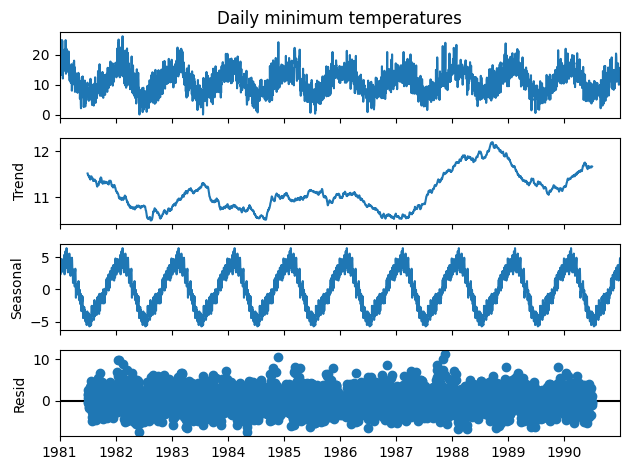

In [ ]:
# Convert 'Daily minimum temperatures' to numeric, handling errors
df['Daily minimum temperatures'] = pd.to_numeric(df['Daily minimum temperatures'], errors='coerce')

# Impute missing values using a suitable method (e.g., forward fill)
df['Daily minimum temperatures'] = df['Daily minimum temperatures'].fillna(method='ffill')

# Now, apply seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['Daily minimum temperatures'], model='additive', period=365)

# Plot the decomposed components
decomposition.plot()
plt.show()

In [ ]:
# Calculer les moyennes mobiles sur 7 et 30 jours et les ajouter au DataFrame
df['MA_7'] = df['Daily minimum temperatures'].rolling(window=7).mean()
df['MA_30'] = df['Daily minimum temperatures'].rolling(window=30).mean()

2.7 : Appliquer une moyenne mobile (7 jours et 30 jours) et comparer avec la série originale

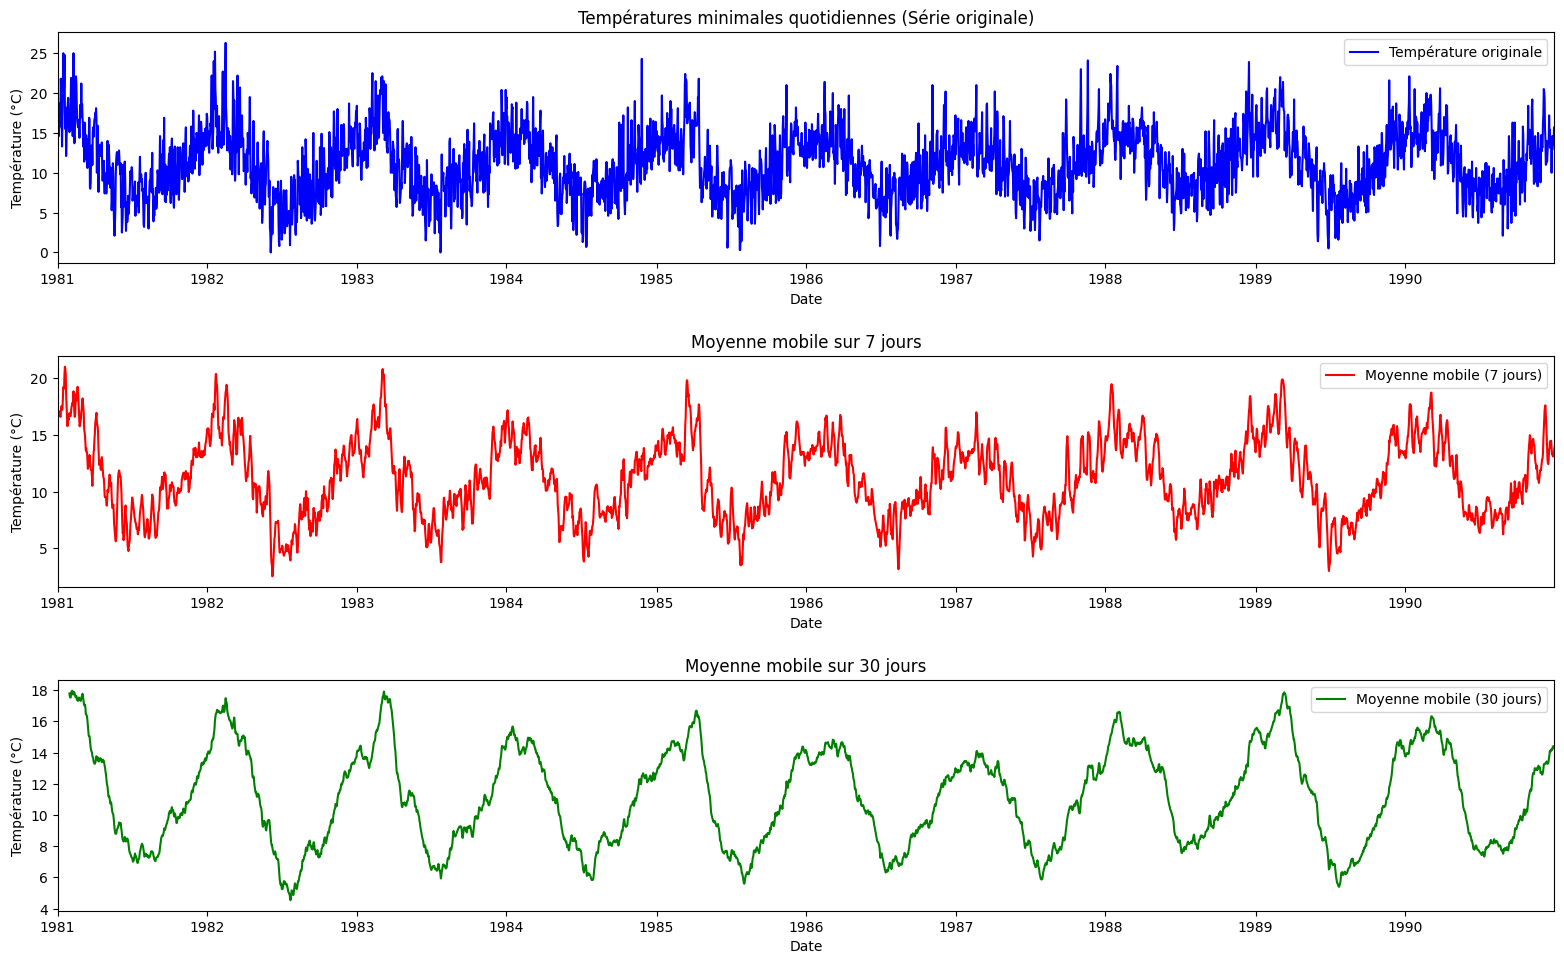

In [ ]:
# Créer une figure avec 3 graphiques (un pour chaque courbe)
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=1)
# Tracer la série originale (températures minimales quotidiennes)
sns.lineplot(data=df, x=df.index, y='Daily minimum temperatures', ax=axes[0], color='blue', label='Température originale')
axes[0].set_title('Températures minimales quotidiennes (Série originale)')
axes[0].set_xlim(df.index.min(), df.index.max())
axes[0].set_ylabel('Température (°C)')
axes[0].legend()

# Tracer la moyenne mobile sur 7 jours
sns.lineplot(data=df, x=df.index, y='MA_7', ax=axes[1], color='red', label='Moyenne mobile (7 jours)')
axes[1].set_title('Moyenne mobile sur 7 jours')
axes[1].set_xlim(df.index.min(), df.index.max())
axes[1].set_ylabel('Température (°C)')
axes[1].legend()

# Tracer la moyenne mobile sur 30 jours
sns.lineplot(data=df, x=df.index, y='MA_30', ax=axes[2], color='green', label='Moyenne mobile (30 jours)')
axes[2].set_title('Moyenne mobile sur 30 jours')
axes[2].set_xlim(df.index.min(), df.index.max())
axes[2].set_ylabel('Température (°C)')
axes[2].legend()

# Ajuster l'espacement entre les graphiques
fig.tight_layout(pad=2)

# Afficher la figure
plt.show()

2.8 : Identifier les mois les plus froids et les plus chauds sur l’ensemble des années disponibles

In [ ]:
# Extraire le mois et l'année à partir de l'index de dates
df['Month'] = df.index.month
df['Year'] = df.index.year

In [ ]:
# Calculer la température moyenne par mois et identifier les mois les plus froids et les plus chauds
monthly_avg = df.groupby('Month')['Daily minimum temperatures'].mean()
coldest_month = monthly_avg.idxmin()
hottest_month = monthly_avg.idxmax()

print(f"Mois le plus froid : {coldest_month} (Température moyenne : {monthly_avg.min()} °C)")
print(f"Mois le plus chaud : {hottest_month} (Température moyenne : {monthly_avg.max()} °C)")

Mois le plus froid : 7 (Température moyenne : 6.724838709677419 °C)
Mois le plus chaud : 2 (Température moyenne : 15.373758865248226 °C)


2.9 : Calculer l’autocorrélation et tracer le graphique ACF (Autocorrelation Function)

<Figure size 1200x600 with 0 Axes>

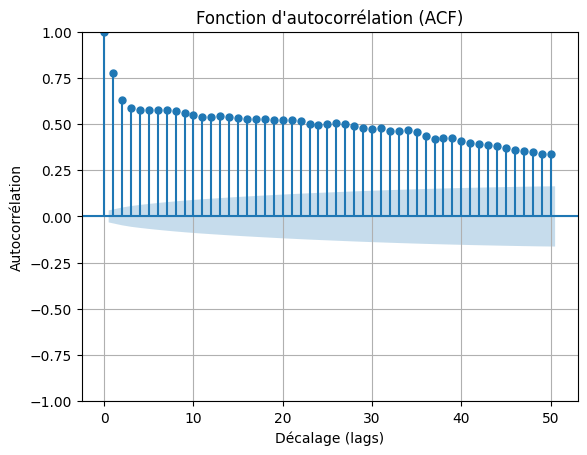

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Tracer la fonction d'autocorrélation (ACF) pour les températures minimales
plt.figure(figsize=(12, 6))
plot_acf(df['Daily minimum temperatures'], lags=50)
plt.title('Fonction d\'autocorrélation (ACF)')
plt.xlabel('Décalage (lags)')
plt.ylabel('Autocorrélation')
plt.grid(True)
plt.show()

2.10 : Identifier si la série est stationnaire en utilisant le test de Dickey-Fuller

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Appliquer le test de Dickey-Fuller sur la colonne des températures minimales
result = adfuller(df['Daily minimum temperatures'])

# Afficher les résultats du test
print(f"Statistique ADF : {result[0]}")
print(f"p-value : {result[1]}")
print(f"Valeurs critiques : {result[4]}")

# Interpréter les résultats
if result[1] > 0.05:
    print("La série n'est PAS stationnaire.")
else:
    print("La série est stationnaire.")

Statistique ADF : -4.438768547217581
p-value : 0.0002532908223470075
Valeurs critiques : {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842}
La série est stationnaire.
